In [1]:
#Tarvittavien kirjastojen tuominen.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Datan avaaminen nettisivulta.
df = pd.read_csv('http://taanila.fi/data1.csv', delimiter = ';')


In [3]:
#Muuttujien tekstimuotoisten arvojen tallentaminen.
koulutus = ["peruskoulu", "2. aste", "korkeakoulu", "ylempi korkeakoulu"]
tyytyväisyys = ["tyytymätön", "jokseenkin tyytyväinen", "tyytyväinen", "todella tyytyväinen"]
sukupuoli = ["mies", "nainen"]

In [4]:
#N-arvot seuraavaa taulukointia varten.
dfn=df.groupby('sukupuoli')['koulutus'].count()

In [5]:
#Ristiintaulukointi miesten ja naisten koulutuksista crosstabin avulla.
df1 = pd.crosstab(df["koulutus"],df["sukupuoli"], normalize = "columns")
df1.index = koulutus
df1.columns.name = ""
mies='Mies (n='+str(dfn[1])+')'
nainen='Nainen (n='+str(dfn[2])+')'
df1.columns = [mies, nainen]
df1.style.format('{:.0%}')

,Mies (n=62),Nainen (n=19)
peruskoulu,35%,26%
2. aste,37%,37%
korkeakoulu,24%,37%
ylempi korkeakoulu,3%,0%


[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%')]

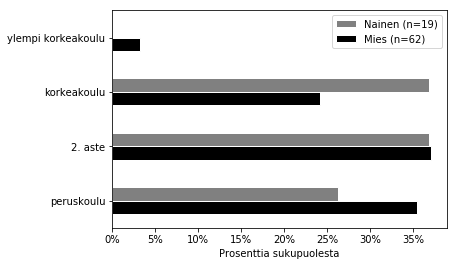

In [35]:
#Pylväskaavio edellisestä. Lisäksi muokkasin pylväät selitteiden mukaisesti oikeaan järjestykseen.
ax=df1.plot.barh(color=["black", "grey"], edgecolor = "white")
plt.xlabel("Prosenttia sukupuolesta")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

Text(0.5, 0, 'Käyttäjien lukumäärä')

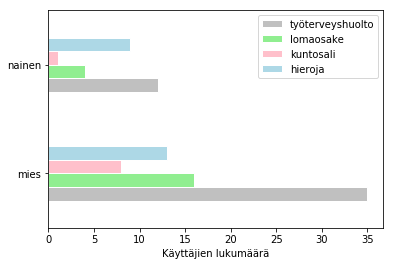

In [29]:
#Monivalintojen lukumäärien laskeminen count-funktiolla sukupuolten mukaisesti.
df2 = df.groupby ("sukupuoli")["työterveyshuolto", "lomaosake", "kuntosali", "hieroja"].count()
df2.index = sukupuoli
df2.plot.barh(color=["silver", "lightgreen", "pink", "lightblue"], edgecolor = "white")
plt.xlabel("Käyttäjien lukumäärä")

Text(0, 0.5, 'Lukumäärä')

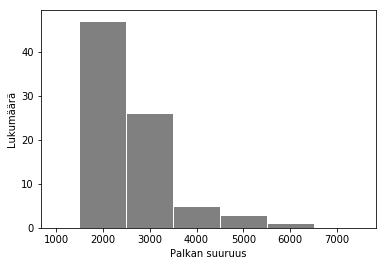

In [38]:
#Palkkojen luokiteltu jakauma bins -toiminnolla ja histogrammi kyseisestä luokitellusta jakaumasta.
bins = [1000, 1500, 2500, 3500, 4500, 5500, 6500, 7500]
df["palkkaluokka"] = pd.cut(df["palkka"], bins = 1000)
df3 = pd.crosstab(df["palkkaluokka"], "n")
df3.columns.name = ""
df3
df["palkka"].plot.hist(bins, color="grey", edgecolor = "white")
plt.xlabel("Palkan suuruus")
plt.ylabel("Lukumäärä")